## Linear Regression using Bayesian Modelling

In [ ]:
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(array([12., 11.,  8.,  6., 10., 16., 11.,  9.,  7., 10.]),
 array([10.63086685, 11.17709225, 11.72331765, 12.26954304, 12.81576844,
        13.36199384, 13.90821924, 14.45444464, 15.00067004, 15.54689543,
        16.09312083]),
 <a list of 10 Patch objects>)

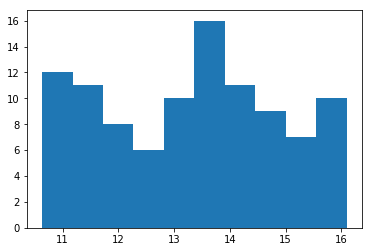

In [58]:
#Linear Regression with Bayes theorem
#y = mx + c
size=100
noise = np.random.normal(0, 0.1,size)
x = np.random.uniform(1,10, size)
y_obs = 0.6*x + 10 + noise
plt.hist(y_obs)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [std, c, coeff]
100%|███████████████████████████████████████████████████████████████████████████| 11000/11000 [00:18<00:00, 592.62it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
E:\AnacondaNew\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


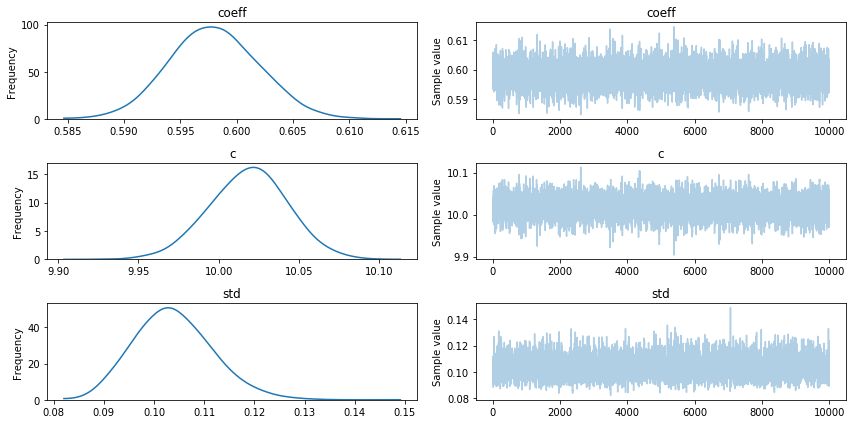

In [63]:
with pm.Model() as example:
    coeff = pm.Normal('coeff',mu=12,sd=1)
    c= pm.Normal('c',mu=5,sd=10)
    mu = coeff * x + c
    std = pm.Gamma('std',5,1)
    y = pm.Normal('y',mu=mu, sd=std, observed = y_obs)
    
    trace = pm.sample(10000, tune=1000, chains=2)
    pm.traceplot(trace,['coeff','c','std'])
    plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 810.85it/s]


RMSE=0.10030510446455027


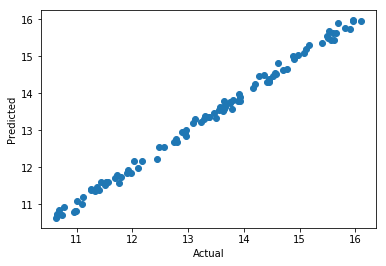

In [62]:
#Predictions on training data, x is used implicitly
with example:
    ppc = pm.sample_ppc(trace,samples=100)
    y_pred = ppc['y']
    
    Point_pred = np.mean(y_pred.T, axis=1)
    #print("Shape of mean:" + str(Point_pred.shape))
    print("RMSE=" + str(np.sqrt(np.mean( (y_obs-Point_pred)**2 ))))
    
    plt.plot(y_obs,Point_pred,"o" )
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()    

13.262352279588315